In [45]:
using LinearAlgebra, Plots

SVD exists for all matrices $A \in \mathbb{R}^{m \times n}$.

__Reduced SVD:__ $A = \hat{U} \hat{\Sigma} V^*$ where $\hat{U}$ is $m \times n$, $\hat{\Sigma}$ is $n \times n$ and $V$ is $n \times n$. $\hat{U}$ and $\hat{V}$ has orthonormal vectors. Off-diagonals of $\hat{\Sigma}$ are zero.

__Full SVD:__ Considering $m>n$, $\hat{U}$ can be expanded to unitary matrix $U$ by additional $m - n$ orthonormal columns. These new columns has no effect on the form of $A$, so $\hat{\Sigma}$ is expanded to $m \times n$ dimensional $\Sigma$ by additional $m-n$ rows of zeros. $A = U \Sigma V^*$.

__Note:__ In case $A$ has $r$ independent columns and rank-deficient, full SVD can still be obtained by $U$ with $r$ columns that form $A$ and $m-r$ support columns, and $\Sigma$ adjusted accordingly.

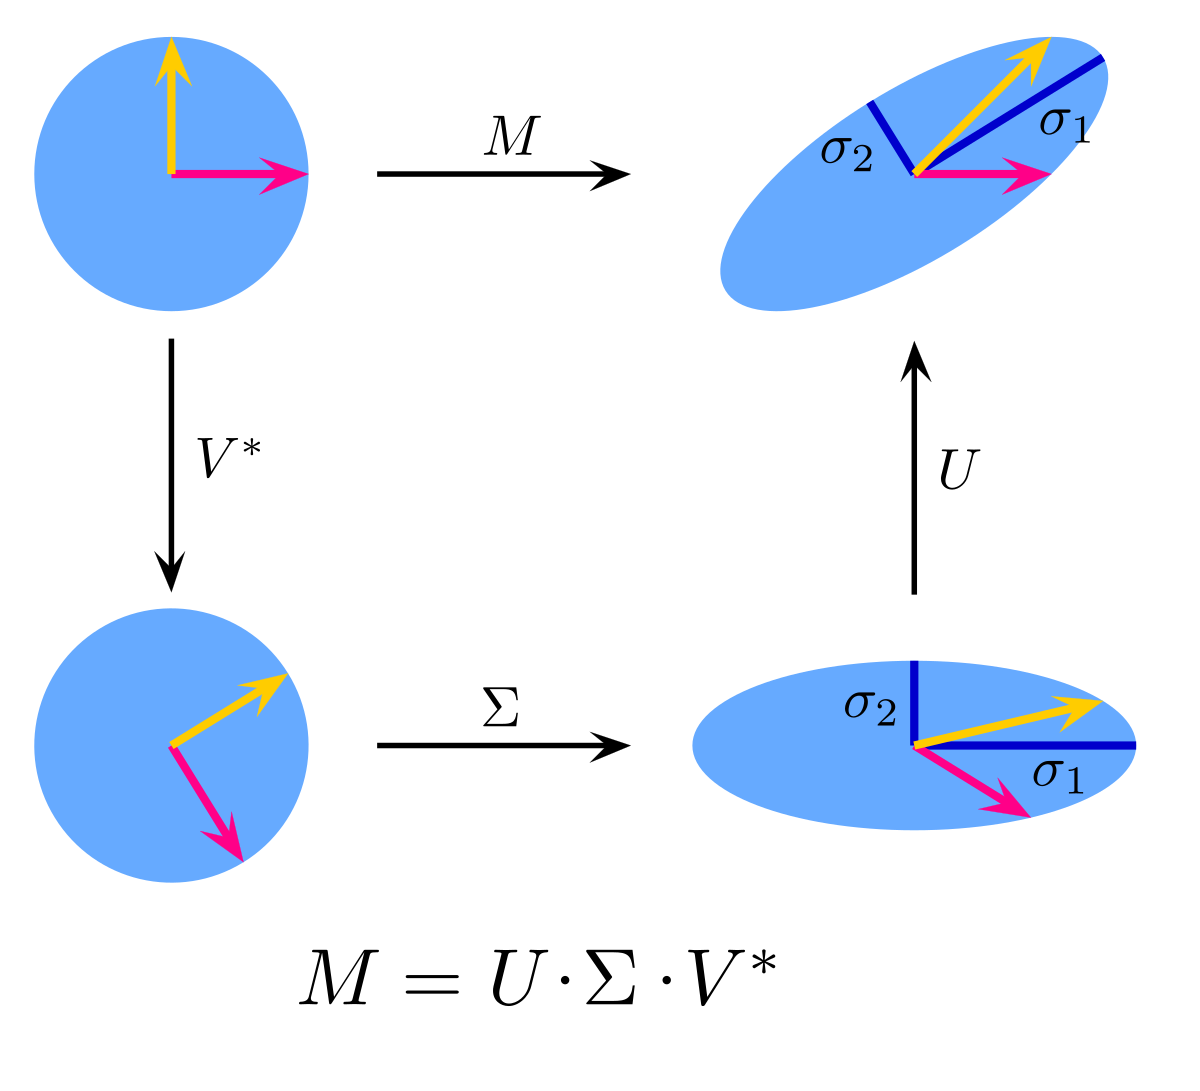

In [2]:
display("image/png", read("svd.png"))

The effect of a matrix $M$ on the set of unit vectors is illustrated above. The image of unit sphere under $V^*$ is a rotated unit sphere. This is because $V^*$ is unitary matrix and vectors multiplied with unitary matrices preserve their length and angles between each other. $\Sigma$ stretches and shears it along the principle semi-axises. Unitary matrix $U$ then rotates it without changing the vector lengths and angles between them.

# SVD - Eigenvalue Desomposition Relation

- Eigenvalue desomposition is only defined for square matrices, but SVD exists for all matrices

- While eigenvalue decomposition uses one bases (eigenvectors), SVD uses two bases (U,V).

- Bases of SVD are orthonormal, but this is often not the case for eigenvectors.

- In applications, eigenvalues are often used to understand iterative behaviours of matrices such as $A^k$ or $e^{At}$. On the other hand, SVD is used to understand the behaviour of $A$ itself, or its inverse.

Consider $A = U \Sigma V^*$, then $A^*A = V \Sigma^* \Sigma V^*$ and $A A^* = U \Sigma \Sigma^* U^*$. Since $V$ and $U$ are orthonormal, their inverses equal to adjoints (transpose if entities are real). Therefore, they are the eigenvectors of $A^*A$ and $A A^*$ with eigenvalues given in the diagonals of $\Sigma^* \Sigma$ and $\Sigma \Sigma^*$, respectively.

In [13]:
A = randn(6,4)
U,S,V = svd(A, full=true)
;

In [14]:
U

6×6 Array{Float64,2}:
 -0.50563     0.184141     0.138171   -0.440436    0.661434  -0.244664
  0.569952   -0.546734    -0.201434   -0.0301129   0.566592  -0.117167
 -0.0743184   0.118831     0.0934353   0.718515    0.123649  -0.66338 
  0.38587     0.00619699   0.590905   -0.430298   -0.294186  -0.479787
 -0.173635   -0.385636     0.739216    0.292967    0.164134   0.4024  
  0.484691    0.710141     0.189722    0.133638    0.335713   0.306949

In [15]:
S

4-element Array{Float64,1}:
 2.6612974941180583
 1.873569344603543 
 1.1242129382069683
 0.5127664046029196

In [16]:
V

4×4 Adjoint{Float64,Array{Float64,2}}:
 -0.53958    0.310695    -0.474078   -0.622552
  0.442289  -0.00186661   0.485581   -0.754048
 -0.648422   0.178728     0.734255    0.092059
  0.304602   0.933553     0.0181765   0.188059

In [17]:
eigen(A'*A)

Eigen{Float64,Float64,Array{Float64,2},Array{Float64,1}}
eigenvalues:
4-element Array{Float64,1}:
 0.2629293856894036
 1.263854730431944 
 3.5102620890381475
 7.082504352199037 
eigenvectors:
4×4 Array{Float64,2}:
 -0.622552   0.474078    0.310695    -0.53958 
 -0.754048  -0.485581   -0.00186661   0.442289
  0.092059  -0.734255    0.178728    -0.648422
  0.188059  -0.0181765   0.933553     0.304602

In [18]:
S.^2

4-element Array{Float64,1}:
 7.082504352199057 
 3.5102620890381497
 1.2638547304319447
 0.262929385689405 

In [19]:
eigen(A*A')

Eigen{Float64,Float64,Array{Float64,2},Array{Float64,1}}
eigenvalues:
6-element Array{Float64,1}:
 -2.6578477368090237e-16
  3.885780586188048e-16 
  0.26292938568940527   
  1.2638547304319427    
  3.510262089038148     
  7.082504352199047     
eigenvectors:
6×6 Array{Float64,2}:
 -0.323055   0.62689    0.440436   -0.138171    0.184141    -0.50563  
 -0.339092   0.468798   0.0301129   0.201434   -0.546734     0.569952 
  0.356382   0.573021  -0.718515   -0.0934353   0.118831    -0.0743184
  0.540866   0.15558    0.430298   -0.590905    0.00619699   0.38587  
 -0.392666  -0.186223  -0.292967   -0.739216   -0.385636    -0.173635 
 -0.454886   0.0       -0.133638   -0.189722    0.710141     0.484691 

Note that eigenvalues of $A^* A$ and $A A^*$ are diagonal elements of $\Sigma^* \Sigma$ and $\Sigma \Sigma^*$, respectively. This explains why all the eigenvalues of positive semidefinite matrices are nonnegative. Moreover their eigenvectors are sometimes have different signs with $V$ and $U$. The reason is that eigenvectors can be scaled but still keep their eigenvalues same.

# Matrix Properties via SVD

- The rank of A is r, the number of nonzero singular values.

- range$(A) = \left< u_1,u_2,...,u_r \right>$, null$(A) = \left< v_{r+1},v_{r+2},...,v_{n} \right>$

- $||A||_2 = \sigma_1$, $||A||_F = \sqrt{\sigma_1^2 + \sigma_2^2 + ... + \sigma_r^2}$

- For $A \in \mathbb{R}^{n \times n}$, $|det(A)| = \prod \limits_{i=1}^n \sigma_n$

- $A = \sum \limits_{j=1}^{r} \sigma_j u_j v_j^*$

In [20]:
A = randn(6,6)
det(A)

-6.9901613280197

In [25]:
U,S,V = svd(A);
prod(S)

6.990161328019688

# Latent Semantic Indexing

In [28]:
d1 = "ronaldo scored two times"
d2 = "messi and ronaldo will play"
d3 = "messi breaks the goal record"
d4 = "people work remotely"
;

In [29]:
word_list = ["ronaldo", "score", "two", "times", "messi", "play", "break", "goal", "record", "people", "work", "remote"]

12-element Array{String,1}:
 "ronaldo"
 "score"  
 "two"    
 "times"  
 "messi"  
 "play"   
 "break"  
 "goal"   
 "record" 
 "people" 
 "work"   
 "remote" 

In [49]:
X = zeros(4,12)
X[1,1:4] = ones(4)
X[2,5:6] = ones(2)
X[2,1] = 1.0
X[3,7:9] = ones(3)
X[3,5] = 1.0
X[4,10:12] = ones(3)
X = X ./ sum(X,dims=2)

4×12 Array{Float64,2}:
 0.25      0.25  0.25  0.25  0.0       …  0.0   0.0       0.0       0.0     
 0.333333  0.0   0.0   0.0   0.333333     0.0   0.0       0.0       0.0     
 0.0       0.0   0.0   0.0   0.25         0.25  0.0       0.0       0.0     
 0.0       0.0   0.0   0.0   0.0          0.0   0.333333  0.333333  0.333333

In [50]:
U,S,V = svd(X,full=true);

In [51]:
S

4-element Array{Float64,1}:
 0.6454972243679027
 0.5773502691896257
 0.5000000000000001
 0.408248290463863 

In [52]:
U

4×4 Array{Float64,2}:
 -0.408248  0.0   0.707107      0.57735
 -0.816497  0.0  -2.77556e-17  -0.57735
 -0.408248  0.0  -0.707107      0.57735
  0.0       1.0   0.0           0.0    

In [53]:
V

12×12 Adjoint{Float64,Array{Float64,2}}:
 -0.579751  0.0       0.353553     …   0.144662    0.144662    0.144662 
 -0.158114  0.0       0.353553         0.214174    0.214174    0.214174 
 -0.158114  0.0       0.353553         0.128961    0.128961    0.128961 
 -0.158114  0.0       0.353553        -0.487797   -0.487797   -0.487797 
 -0.579751  0.0      -0.353553        -0.0619981  -0.0619981  -0.0619981
 -0.421637  0.0      -3.69942e-17  …  -0.0826642  -0.0826642  -0.0826642
 -0.158114  0.0      -0.353553         0.020666    0.020666    0.020666 
 -0.158114  0.0      -0.353553         0.020666    0.020666    0.020666 
 -0.158114  0.0      -0.353553         0.020666    0.020666    0.020666 
  0.0       0.57735   0.0              0.666667   -0.333333   -0.333333 
  0.0       0.57735   0.0          …  -0.333333    0.666667   -0.333333 
  0.0       0.57735   0.0             -0.333333   -0.333333    0.666667 

Let's define the number of topics in this corpus as two. Then we approximate $X \approx D C W$ where D is matrix of documents and W is matrix of words. Each document in the corpus and each word is then represented by 2 dimensional vectors which locates them on the space of topics. 

In [54]:
D = U[:,1:2]
W = V[1:2,:]
C = diagm(S[1:2])
X_approx = D*C*W

4×12 Array{Float64,2}:
  0.152778   0.0  -0.0931695  …  -0.0381219  -0.0381219  -0.0381219
  0.305556   0.0  -0.186339      -0.0762437  -0.0762437  -0.0762437
  0.152778   0.0  -0.0931695     -0.0381219  -0.0381219  -0.0381219
 -0.0912871  0.0   0.204124       0.123653    0.123653    0.123653 

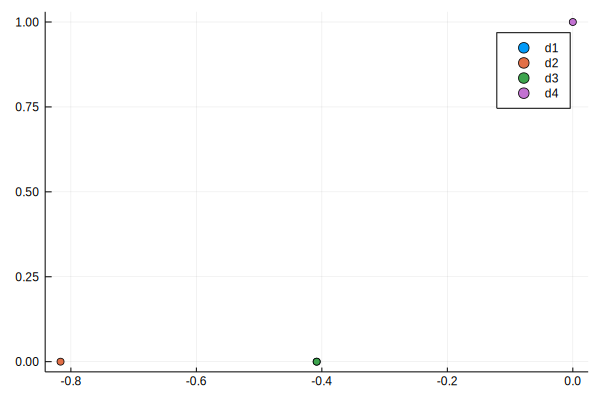

In [55]:
# Visualize the documents on the space of topics
plot((D[1,1],D[1,2]),seriestype = :scatter,label="d1")
plot!((D[2,1],D[2,2]),seriestype = :scatter,label="d2")
plot!((D[3,1],D[3,2]),seriestype = :scatter,label="d3")
plot!((D[4,1],D[4,2]),seriestype = :scatter,label="d4")

Note that although d1 and d3 have no common words, LSI locates them on the same coordinates. d4 is placed far away from d1,d2 and d3. Words have 2-dimensional representations similarly.

Now, suppose that we want to use LSI for information retrieval with query "messi goal". Obviously, d3 will be have a high ranking score since it contains both words. Similarly, we expect d2 to have a high ranking score since it contains "messi". What about d1 and d4. Both documents does not contain the query words but we know that d1 is definitely more relevant to query.

We place the query on the space of topics by taking the average of word vectors that constitutes it. After that we check the cosine similarity.

In [56]:
q = (W[:,5] + W[:,8]) ./ 2

2-element Array{Float64,1}:
 -0.04304156193728351
  0.3738260870858114 

In [57]:
cos_similar(a,b) = (a' * b)/(norm(a)*norm(b))

cos_similar (generic function with 1 method)

In [58]:
cos_similar(q,D[1,:])

0.11438225833270502

In [59]:
cos_similar(q,D[2,:])

0.11438225833270499

In [60]:
cos_similar(q,D[3,:])

0.11438225833270499

In [61]:
cos_similar(q,D[4,:])

0.9934368117694806

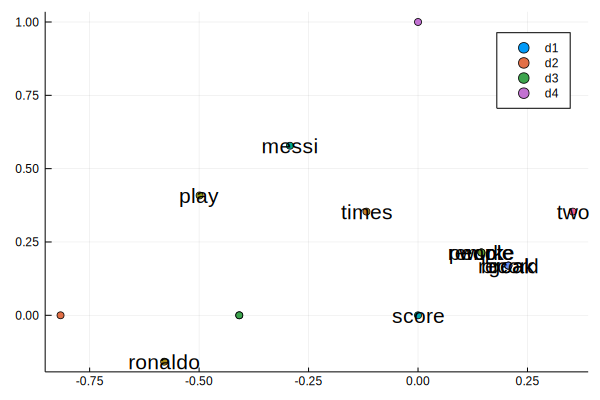

In [68]:
# Visualize the documents and words on the space of topics
plt = plot((D[1,1],D[1,2]),seriestype = :scatter,label="d1")
plot!((D[2,1],D[2,2]),seriestype = :scatter,label="d2")
plot!((D[3,1],D[3,2]),seriestype = :scatter,label="d3")
plot!((D[4,1],D[4,2]),seriestype = :scatter,label="d4")
for i=1:12
    plot!((W[1,i],W[2,i]),seriestype = :scatter,series_annotations = [word_list[i]], label=false)
end
plt